<a href="https://colab.research.google.com/github/shyoon9512/ML_self_Study/blob/main/BA_textbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!mkdir -p friendhook
!wget https://github.com/books-by-chansung/ds-bookcamp/raw/main/Profiles.csv -O friendhook/Profiles.csv
!wget https://github.com/books-by-chansung/ds-bookcamp/raw/main/Observations.csv -O friendhook/Observations.csv
!wget https://github.com/books-by-chansung/ds-bookcamp/raw/main/Friendships.csv -O friendhook/Friendships.csv

--2025-05-07 08:48:06--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/Profiles.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/Profiles.csv [following]
--2025-05-07 08:48:06--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/Profiles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310197 (303K) [text/plain]
Saving to: ‘friendhook/Profiles.csv’

friendhook/Profiles 100%[===================>] 302.93K  --.-KB/s    in 0.04s   

2025-05-07 08:48:06 (6.63 MB/s) - ‘friendhook/Profiles.csv’ saved [310197/310197]

--2025-05-07 0

                                 Feature Data Type  Non-Null Count  \
Profile_ID                    Profile_ID    object            4039   
Sex                                  Sex    object            4039   
Relationship_Status  Relationship_Status    object            3631   
Dorm                                Dorm    object            4039   
Major                              Major    object            4039   
Year                                Year    object            4039   

                     Null Count  Unique values  \
Profile_ID                    0           4039   
Sex                           0              2   
Relationship_Status         408              3   
Dorm                          0             15   
Major                         0             30   
Year                          0              4   

                                                         Sampel values  
Profile_ID           [b8bc075e54b9, 49194b3720b6, f0f5962bbc52, d42...  
Sex         

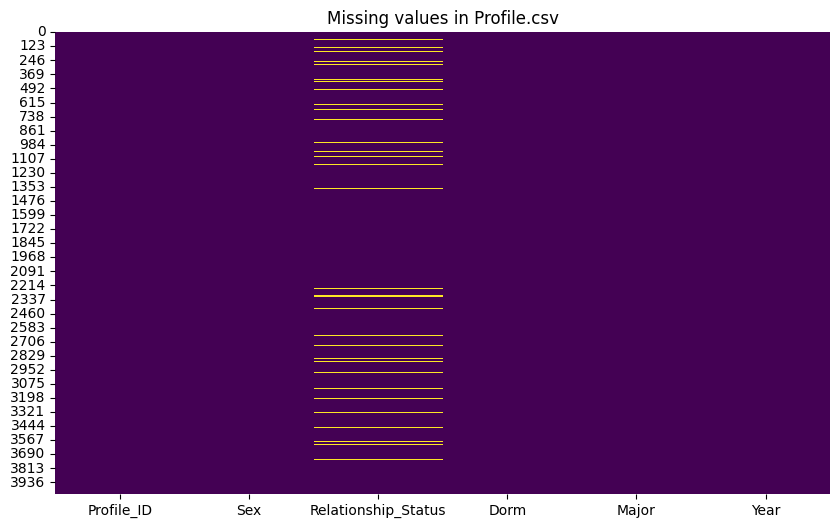

Relationship_Status    408
Profile_ID               0
Sex                      0
Dorm                     0
Major                    0
Year                     0
dtype: int64


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_profile = pd.read_csv('friendhook/Profiles.csv')

def feature_summary(df) :
    summary_df = pd.DataFrame({
        "Feature" : df.columns,
        "Data Type" : df.dtypes,
        "Non-Null Count" : df.notna().sum(),
        "Null Count" : df.isna().sum(),
        "Unique values" : df.nunique(),
        "Sampel values" : [df[col].unique()[:5] for col in df.columns]
    })
    return summary_df


# 요약
profile_summary = feature_summary(df_profile)
print(profile_summary)

# 결측치 가시화
plt.figure(figsize=(10, 6))
sns.heatmap(df_profile.isna(), cbar = False, cmap= 'viridis')
plt.title("Missing values in Profile.csv")
plt.show()

# 결측치 개수 상위 10개
missing_count = df_profile.isna().sum().sort_values(ascending=False)
print(missing_count.head(10))

# 결측치 확인 및 Null값 전처리

In [13]:
import pandas as pd

df_profile = pd.read_csv('friendhook/Profiles.csv')

# 결측치 개수
missing_value = df_profile.isna().sum()

# 결측치가 있는 열만 필터링
missing_columns = missing_value[missing_value >0]

print(missing_value)

print()
print(missing_columns)
print()
# Relationship_Status에 놓여있는 값 확인하기
print("속한 값은",set(df_profile.Relationship_Status.values))

Profile_ID               0
Sex                      0
Relationship_Status    408
Dorm                     0
Major                    0
Year                     0
dtype: int64

Relationship_Status    408
dtype: int64

속한 값은 {'9cea719429e9', nan, '188f9a32c360', 'ac0b88e46e20'}


In [14]:
print(df_profile.describe(include='all'))
print()
print(df_profile.head(10))

          Profile_ID           Sex Relationship_Status          Dorm  \
count           4039          4039                3631          4039   
unique          4039             2                   3            15   
top     cb4be25afda7  e807eb960650        ac0b88e46e20  a8e6e404d1b3   
freq               1          2020                1963          2739   

               Major          Year  
count           4039          4039  
unique            30             4  
top     141d4cdd5aaf  c1a648750a4b  
freq            1366          1796  

     Profile_ID           Sex Relationship_Status          Dorm         Major  \
0  b8bc075e54b9  6fb336b554b6        9cea719429e9  4bb4df9e464e  827e5c7758c2   
1  49194b3720b6  6fb336b554b6        ac0b88e46e20  a8e6e404d1b3  3c285c164f0c   
2  f0f5962bbc52  6fb336b554b6        ac0b88e46e20  a8e6e404d1b3  f99bb3b6a185   
3  d42f06d92a52  6fb336b554b6        ac0b88e46e20  2a59be064efd  db85f196a0a8   
4  81123b29ee66  e807eb960650        9cea719429e

In [15]:
import numpy as np

category_map = {'188f9a32c360' : 0, np.nan : 1, '9cea719429e9' : 2, 'ac0b88e46e20' : 3}

# 위 것으로 매핑하기
nums = [category_map[hash_code]
        for hash_code in df_profile.Relationship_Status.values]

df_profile['Relationship_Status'] = nums
print(df_profile)

        Profile_ID           Sex  Relationship_Status          Dorm  \
0     b8bc075e54b9  6fb336b554b6                    2  4bb4df9e464e   
1     49194b3720b6  6fb336b554b6                    3  a8e6e404d1b3   
2     f0f5962bbc52  6fb336b554b6                    3  a8e6e404d1b3   
3     d42f06d92a52  6fb336b554b6                    3  2a59be064efd   
4     81123b29ee66  e807eb960650                    2  a8e6e404d1b3   
...            ...           ...                  ...           ...   
4034  78e200cb274d  6fb336b554b6                    3  a8e6e404d1b3   
4035  632877112b08  e807eb960650                    2  a8e6e404d1b3   
4036  2fcb9e82642e  6fb336b554b6                    3  a8e6e404d1b3   
4037  8ab2149b48e9  e807eb960650                    3  a8e6e404d1b3   
4038  cb4be25afda7  6fb336b554b6                    2  2a59be064efd   

             Major          Year  
0     827e5c7758c2  c1a648750a4b  
1     3c285c164f0c  8724226d4754  
2     f99bb3b6a185  c1a648750a4b  
3     d

# 나머지 해시 값 변경

In [16]:
'''
나머지 해시 값도 변경해야 한다. 머신러닝에서는 해당 값을 읽을 수 없기 때문이다.
'''

col_to_mapping = {"Relationship_Status" : category_map}
for column in df_profile.columns :
  if column in col_to_mapping :
    continue

  unique_ids = sorted(set(df_profile[column].values))
  category_map = {id_ : i for i, id_ in enumerate(unique_ids)}
  col_to_mapping[column] = category_map

  df_profile[column] = df_profile[column].map(category_map)

print(df_profile.head(10))


   Profile_ID  Sex  Relationship_Status  Dorm  Major  Year
0        2899    0                    2     5     13     2
1        1125    0                    3    12      6     1
2        3799    0                    3    12     29     2
3        3338    0                    3     4     25     0
4        2007    1                    2    12      2     0
5        2781    1                    3    12      2     3
6        2864    1                    3    12      2     0
7        3047    0                    2     4     11     0
8        2390    0                    2    12      2     2
9         453    0                    1    12      2     3


In [17]:
# mapping 결과 값 확인하기
print(df_profile.describe())
print(df_profile.head(10))
print(df_profile.tail(10))

        Profile_ID          Sex  Relationship_Status         Dorm  \
count  4039.000000  4039.000000          4039.000000  4039.000000   
mean   2019.000000     0.500124             2.249814     9.702649   
std    1166.103197     0.500062             0.891729     4.062960   
min       0.000000     0.000000             0.000000     0.000000   
25%    1009.500000     0.000000             2.000000     9.000000   
50%    2019.000000     1.000000             2.000000    12.000000   
75%    3028.500000     1.000000             3.000000    12.000000   
max    4038.000000     1.000000             3.000000    14.000000   

             Major         Year  
count  4039.000000  4039.000000  
mean      8.134439     1.322605  
std       7.704260     0.899431  
min       0.000000     0.000000  
25%       2.000000     1.000000  
50%       4.000000     2.000000  
75%      13.000000     2.000000  
max      29.000000     3.000000  
   Profile_ID  Sex  Relationship_Status  Dorm  Major  Year
0        2899

# 실험 관찰 결과 살펴보기

In [18]:
df_obs = pd.read_csv('friendhook/Observations.csv')
print(df_obs.describe())
print(df_obs.shape)
print("\n결측치 정보 확인")
print(df_obs.isna().sum())

          Profile_ID Selected_Friend Selected_Friend_of_Friend  \
count           4039            4039                      4039   
unique          4039            2219                      2327   
top     89581f99fa1e    89581f99fa1e              6caa597f13cc   
freq               1              77                        27   

       Friend_Request_Sent Friend_Request_Accepted  
count                 4039                    4039  
unique                   2                       2  
top                   True                    True  
freq                  2519                    2460  
(4039, 5)

결측치 정보 확인
Profile_ID                   0
Selected_Friend              0
Selected_Friend_of_Friend    0
Friend_Request_Sent          0
Friend_Request_Accepted      0
dtype: int64


In [19]:
df_obs.head(10)

,Profile_ID,Selected_Friend,Selected_Friend_of_Friend,Friend_Request_Sent,Friend_Request_Accepted
0,9e5bec3ed583,b8bc075e54b9,b5e368c3f830,False,False
1,ac5577bc1a57,b8bc075e54b9,dfd572ac8b64,False,False
2,f654a40a9376,b8bc075e54b9,dfd572ac8b64,False,False
3,2e79cae5ff8c,b8bc075e54b9,d86522ac043a,False,False
4,2007780558c9,b8bc075e54b9,15c0812dceff,True,True
5,bb37036f9c97,b8bc075e54b9,45a669e4fc6a,True,True
6,e84bfb0974bb,b8bc075e54b9,89581f99fa1e,False,False
7,cdcb129fb070,b8bc075e54b9,e5160cec7608,True,True
8,3ae230548420,b8bc075e54b9,d86522ac043a,False,False
9,05a4659fe648,b8bc075e54b9,b5e368c3f830,False,False


## column명도 바꿔야 하고, hash code도 바꿔야 한다.

In [20]:
new_names = {
    'Selected_Friend' : 'Friend',
    'Selected_Friend_of_Friend' : 'FoF',
    'Friend_Request_Sent' : 'Sent',
    'Friend_Request_Accepted' : 'Accepted'
}

df_obs = df_obs.rename(columns = new_names)
print(df_obs.describe())

          Profile_ID        Friend           FoF  Sent Accepted
count           4039          4039          4039  4039     4039
unique          4039          2219          2327     2        2
top     89581f99fa1e  89581f99fa1e  6caa597f13cc  True     True
freq               1            77            27  2519     2460


In [21]:
condition = (df_obs.Sent == False) & (df_obs.Accepted == True)
assert not df_obs[condition].shape[0]

print(df_obs)

        Profile_ID        Friend           FoF   Sent  Accepted
0     9e5bec3ed583  b8bc075e54b9  b5e368c3f830  False     False
1     ac5577bc1a57  b8bc075e54b9  dfd572ac8b64  False     False
2     f654a40a9376  b8bc075e54b9  dfd572ac8b64  False     False
3     2e79cae5ff8c  b8bc075e54b9  d86522ac043a  False     False
4     2007780558c9  b8bc075e54b9  15c0812dceff   True      True
...            ...           ...           ...    ...       ...
4034  b8bc075e54b9  676e3d882946  b8bc075e54b9   True      True
4035  736c4caccde3  e4996e5b07d3  736c4caccde3   True      True
4036  f2018cbc4ee7  4e7fa3faa158  f2018cbc4ee7   True      True
4037  15a03987b539  d642104420f6  15a03987b539   True      True
4038  89581f99fa1e  ecb2cde71c83  89581f99fa1e   True      True

[4039 rows x 5 columns]


In [22]:
# 사용자 행동에 수치형 클래스 할당하기
behaviors = []

for sent, accepted in df_obs[['Sent', 'Accepted']].values :
  behavior = 2 if (sent and not accepted) else int(sent) * int(accepted)
  behaviors.append(behavior)

df_obs['Behavior'] = behaviors
print(df_obs)

# 관찰 테이블의 모든 해시 값을 수치형으로 바꾸기
for col in ['Profile_ID', 'Friend', 'FoF']:
  nums = [col_to_mapping['Profile_ID'][hash_code]
          for hash_code in df_obs[col]]
  df_obs[col] = nums

print(df_obs.head())

        Profile_ID        Friend           FoF   Sent  Accepted  Behavior
0     9e5bec3ed583  b8bc075e54b9  b5e368c3f830  False     False         0
1     ac5577bc1a57  b8bc075e54b9  dfd572ac8b64  False     False         0
2     f654a40a9376  b8bc075e54b9  dfd572ac8b64  False     False         0
3     2e79cae5ff8c  b8bc075e54b9  d86522ac043a  False     False         0
4     2007780558c9  b8bc075e54b9  15c0812dceff   True      True         1
...            ...           ...           ...    ...       ...       ...
4034  b8bc075e54b9  676e3d882946  b8bc075e54b9   True      True         1
4035  736c4caccde3  e4996e5b07d3  736c4caccde3   True      True         1
4036  f2018cbc4ee7  4e7fa3faa158  f2018cbc4ee7   True      True         1
4037  15a03987b539  d642104420f6  15a03987b539   True      True         1
4038  89581f99fa1e  ecb2cde71c83  89581f99fa1e   True      True         1

[4039 rows x 6 columns]
   Profile_ID  Friend   FoF   Sent  Accepted  Behavior
0        2485    2899  2847  Fal

# 친구 관계 연결 테이블 살펴보기

In [23]:
df_friends = pd.read_csv('friendhook/Friendships.csv')

print(df_friends.describe())

print(df_friends.head(10))

            Friend_A      Friend_B
count          88234         88234
unique          3646          4037
top     89581f99fa1e  97ba93d9b169
freq            1043           251
       Friend_A      Friend_B
0  b8bc075e54b9  49194b3720b6
1  b8bc075e54b9  f0f5962bbc52
2  b8bc075e54b9  d42f06d92a52
3  b8bc075e54b9  81123b29ee66
4  b8bc075e54b9  b1b65a546a3e
5  b8bc075e54b9  b712b1359e68
6  b8bc075e54b9  c2833a91454a
7  b8bc075e54b9  993a9b1dc2ef
8  b8bc075e54b9  1d54d57a01a7
9  b8bc075e54b9  79ff489ecbc1


## NetworkX에 로드 및 시각화

소셜 그래프에는 4039 개의 노드가 있다.


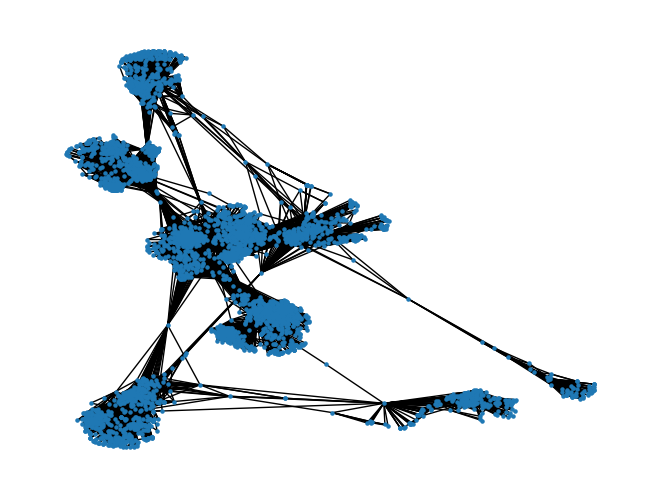

In [24]:
import networkx as nx

G = nx.Graph()
for id1, id2 in df_friends.values:
  node1 = col_to_mapping['Profile_ID'][id1]
  node2 = col_to_mapping['Profile_ID'][id2]
  G.add_edge(node1, node2)

nodes = list(G.nodes)
num_nodes = len(nodes)
print("소셜 그래프에는",num_nodes, "개의 노드가 있다.")


# 시각화
import matplotlib.pyplot as plt
np.random.seed(42)
nx.draw(G, node_size = 5)
plt.show()

# 마코프 클러스터링 진행하기

In [25]:
!pip install markov_clustering networkx scipy


In [26]:
!pip install networkx==2.8.8


import markov_clustering as mc
import networkx as nx
import scipy.sparse as sp

matrix = nx.to_scipy_sparse_matrix(G)
result = mc.run_mcl(matrix)
clusters = mc.get_clusters(result)
num_clusters = len(clusters)
print("소셜 그래프에서",num_clusters,"개의 클러스터가 발견됨.")

<ipython-input-26-1c0fa39c6477>:8: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  matrix = nx.to_scipy_sparse_matrix(G)


소셜 그래프에서 10 개의 클러스터가 발견됨.


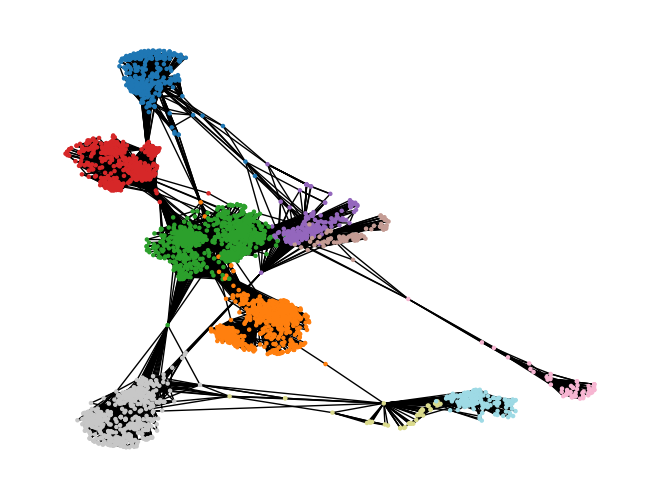

In [28]:
# 노드에 cluster_id 속성 할당하기

for cluster_id, node_indices in enumerate(clusters) :
  for i in node_indices :
    node = nodes[i]
    G.nodes[node]['cluster_id'] = cluster_id

# 클러스터 할당을 기준으로 노드 색상 지정하기
np.random.seed(42)
colors = [G.nodes[n]['cluster_id'] for n in G.nodes]
nx.draw(G, node_size = 5, node_color = colors, cmap = plt.cm.tab20)
plt.show()

In [29]:
# 각 노드에 프로파일 속성 할당하기
attribute_names = df_profile.columns
for attributes in df_profile.values :
  profile_id = attributes[0]
  for name, att in zip(attribute_names[1:], attributes[1:]):
    G.nodes[profile_id][name] = att

first_node = nodes[0]
print(G.nodes[first_node])

{'cluster_id': 0, 'Sex': np.int64(0), 'Relationship_Status': np.int64(2), 'Dorm': np.int64(5), 'Major': np.int64(13), 'Year': np.int64(2)}


# 예측 모델 학습

In [30]:
# 클래스 배열 y 값 할당

y = df_obs.Behavior.values
print(y)

# 엣지 개수에서 특징 행렬 만들기
cols = ['Profile_ID', 'Friend', 'FoF']
features = {f'{col}_Edge_Count' : [] for col in cols}
for node_ids in df_obs[cols].values :
  for node, feature_name in zip(node_ids, features.keys()):
    degree = G.degree(node)
    features[feature_name].append(degree)

df_features = pd.DataFrame(features)
X = df_features.values

[0 0 0 ... 1 1 1]


## 결정 트리 분류기 훈련 및 평가

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def evaluate(X, y, model_type = DecisionTreeClassifier, **kwargs) :
  np.random.seed(42)
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  clf = model_type(**kwargs)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)

  f_measure = f1_score(pred, y_test, average = 'macro')
  return f_measure, clf

f_measure, clf=evaluate(X,y)
print(f_measure)

0.3747379813169287


## pagerank 특징 추가

In [33]:
node_to_pagerank = nx.pagerank(G)
features = {f'{col}_PageRank' : [] for col in cols}
for node_ids in df_obs[cols].values :
  for node, feature_name in zip(node_ids, features.keys()):
    pagerank = node_to_pagerank[node]
    features[feature_name].append(pagerank)

def update_features(new_features) :
  for feature_name, values in new_features.items():
    df_features[feature_name] = values
  return df_features.values

X = update_features(features)
f_measure, clf = evaluate(X, y)

print(f_measure)

0.3893947993347395


## 소셜 그룹 특징 추가하기

In [39]:
features = {f'Shared_Cluster_{e}' : []
            for e in ['id_f', 'id_fof', 'f_fof']}

i = 0
for node_ids in df_obs[cols].values :
  c_id, c_f, c_fof = [G.nodes[n]['cluster_id'] for n in node_ids]
  features['Shared_Cluster_id_f'].append(int(c_id == c_f))
  features['Shared_Cluster_id_fof'].append(int(c_id == c_fof))
  features['Shared_Cluster_f_fof'].append(int(c_f == c_fof))

X = update_features(features)
f_measure, clf = evaluate(X, y)
print(f_measure)


0.39230553304627375


## 중요도 점수에 따른 특징 순위 나열

In [40]:
def view_top_features(clf, feature_names) :
  for i in np.argsort(clf.feature_importances_)[::-1] :
    feature_name = feature_names[i]
    importance = clf.feature_importances_[i]
    if not round(importance, 2) :
      break
    print(f"{feature_name} : {importance:0.2f}")
feature_names = df_features.columns
view_top_features(clf, feature_names)

Friend_PageRank : 0.19
Shared_Cluster_id_fof : 0.18
FoF_PageRank : 0.16
Profile_ID_PageRank : 0.14
Profile_ID_Edge_Count : 0.13
Friend_Edge_Count : 0.11
FoF_Edge_Count : 0.10


## 클러스터 크기에 대한 특징 추가

In [41]:
cluster_sizes = [len(cluster) for cluster in clusters]
features = {f'{col}_Cluster_Size' : [] for col in cols}
for node_ids in df_obs[cols].values :
  for node, feature_name in zip(node_ids, features.keys()) :
    c_id = G.nodes[node]['cluster_id']

    features[feature_name].append(cluster_sizes[c_id])

X = update_features(features)
f_measure, clf = evaluate(X, y)
print(f_measure)

0.4185818370484487


In [42]:
def view_top_features(clf, feature_names) :
  for i in np.argsort(clf.feature_importances_)[::-1] :
    feature_name = feature_names[i]
    importance = clf.feature_importances_[i]
    if not round(importance, 2) :
      break
    print(f"{feature_name} : {importance:0.2f}")
feature_names = df_features.columns
view_top_features(clf, feature_names)

Shared_Cluster_id_fof : 0.18
Friend_PageRank : 0.17
FoF_PageRank : 0.16
Profile_ID_PageRank : 0.13
Friend_Edge_Count : 0.11
Profile_ID_Edge_Count : 0.10
FoF_Edge_Count : 0.09
Profile_ID_Cluster_Size : 0.02
FoF_Cluster_Size : 0.01
Friend_Cluster_Size : 0.01


## 친구 공유 확률 특징 추가

In [45]:
friend_sharing_likelihood = {}
for node in nodes :
  neighbors = list(G[node])
  friendship_count = 0
  total_possible = 0
  for i, node1 in enumerate(neighbors[:-1]) :
    for node2 in neighbors[i+1 :] :
      if node1 in G[node2] :
        friendship_count += 1
      total_possible += 1

  prob = friendship_count / total_possible if total_possible else 0
  friend_sharing_likelihood[node] = prob

In [46]:
features = {f'{col}_Friend_Sharing_Likelihood' : [] for col in cols}
for node_ids in df_obs[cols].values:
  for node, feature_name in zip(node_ids, features.keys()) :
    sharing_likelihood = friend_sharing_likelihood[node]
    features[feature_name].append(sharing_likelihood)

X = update_features(features)
f_measure, clf = evaluate(X, y)
print(f_measure)

0.5056460314809123


In [48]:
# 중요도 점수에 따른 특징 순위 나열

feature_names = df_features.columns
view_top_features(clf, feature_names)

Shared_Cluster_id_fof : 0.18
Friend_Friend_Sharing_Likelihood : 0.12
Profile_ID_PageRank : 0.09
FoF_PageRank : 0.09
Friend_PageRank : 0.09
FoF_Friend_Sharing_Likelihood : 0.09
Profile_ID_Friend_Sharing_Likelihood : 0.08
Profile_ID_Edge_Count : 0.08
FoF_Edge_Count : 0.08
Friend_Edge_Count : 0.06
Friend_Cluster_Size : 0.01
FoF_Cluster_Size : 0.01
Profile_ID_Cluster_Size : 0.01
